<td>
   <a target="_blank" href="https://www.clarifai.com/" ><img src="https://upload.wikimedia.org/wikipedia/commons/b/bc/Clarifai_Logo_FC_Web.png" width=256/></a>
</td>

<td>
<a href="https://colab.research.google.com/github/Clarifai/examples/blob/main/datasets/upload/dataset_upload.ipynb" target="_blank"><img
src="https://colab.research.google.com/assets/colab-badge.svg" alt="Colab"></a>
</td>

# Dataset upload

A dataset is a collection of data examples you can use to annotate and train, test, evaluate your machine learning models. With Clarifai datasets, you can manage the datasets you want to use for visual search, training, and evaluation.

This notebook contains
- Examples of how to upload your datasets into clarifai app using features from `Dataset`.

## Requirements

In [ ]:
!pip install -U clarifai

In [1]:
import os
#Replace your PAT
os.environ['CLARIFAI_PAT'] = "YOUR_PAT"

*Note: Guide to get your [PAT](https://docs.clarifai.com/clarifai-basics/authentication/personal-access-tokens)*

### For Colab

Note: To use the data from the example repo itself

In [ ]:
!git clone https://github.com/Clarifai/examples.git
%cd examples/datasets/upload/

## Dataset Interface

In [8]:
from clarifai.client.dataset import Dataset
#replace your "user_id", "app_id", "dataset_id".
dataset = Dataset(user_id="user_id", app_id="app_id", dataset_id="dataset_id")

## 1. Upload Dataset

- Examples of how to upload your local directory datasets into Clarifai App using `module_dir` feature from `Dataset`.

Base Workflow
- Base workflows index your data and provide your app with a default knowledge base
- For example, if you're training a custom model around text, you could choose the Language-Understanding as your Base Workflow to optimize your custom model performance.
- You can choose one Base Workflow per app, and you can also change your base workflow once your app is created.
- Note: Base Workflow of the app should support respective uploading data types(Example: 'Language-Understanding' for text, 'Universal' for image/video)

### Image Classification - Cifar10

In [9]:
#importing load_module_dataloader for calling the dataloader object in dataset.py in the local data folder
from clarifai.datasets.upload.utils import load_module_dataloader

In [ ]:
cifar_dataloader = load_module_dataloader('./image_classification/cifar10')
#setting get_upload_status = True will show the dataset upload summary.
#setting log_warnings = True will logs the failure status of inputs in a table and save it locally.
dataset.upload_dataset(dataloader=cifar_dataloader,get_upload_status=True, log_warnings=True)

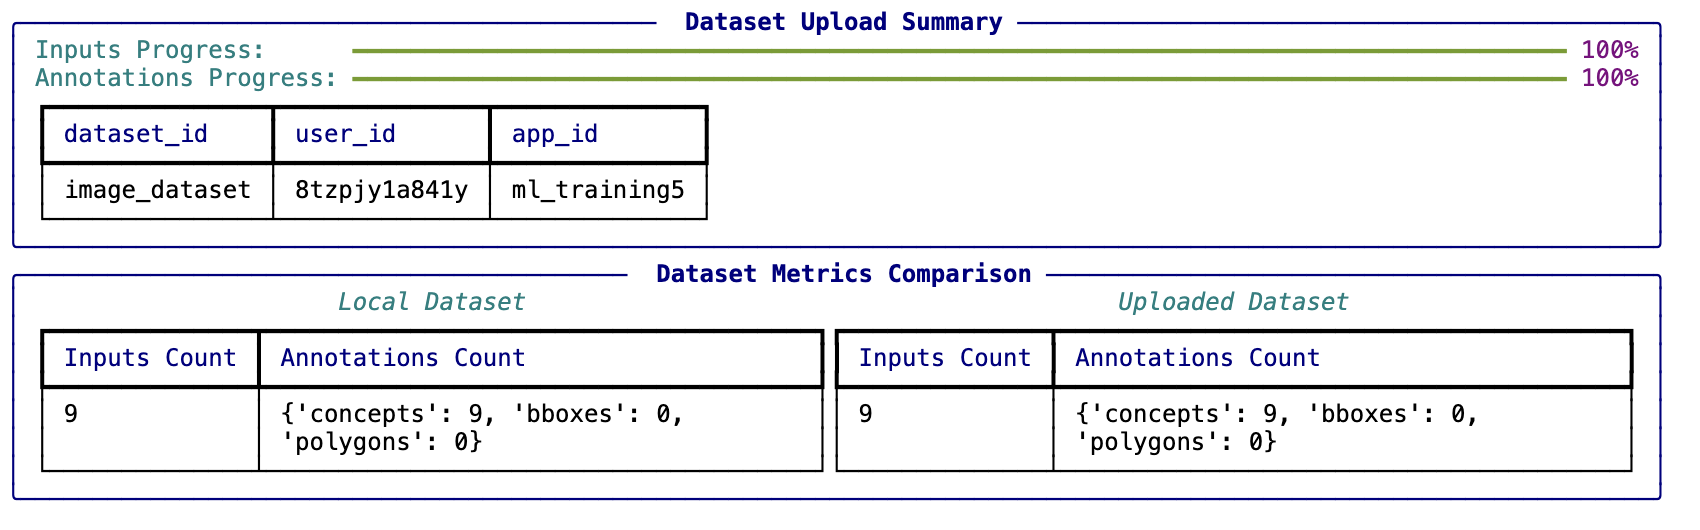

### Object Detection - VOC - 2012

In [ ]:
voc_dataloader = load_module_dataloader('./image_detection/voc')
dataset.upload_dataset(dataloader=voc_dataloader)

### Object Detection - Multi-Folder

In [ ]:
multifolder_dataloader = load_module_dataloader('./image_detection/multifolder', root_dir='./image_detection/multifolder/data')
dataset.upload_dataset(dataloader=multifolder_dataloader)

### Image Segmentation - COCO

In [ ]:
coco_dataloader = load_module_dataloader('./image_segmentation/coco')
dataset.upload_dataset(dataloader=coco_dataloader)

### Retry Upload from log file

Retry upload from logs for failed inputs. When using `upload_dataset` function the failed inputs can be logged into file and later can be used to resume the upload process.
Set `retry_duplicates` to True if you want to retry duplicate with new Input_id in current dataset.


In [ ]:
cifar_dataloader = load_module_dataloader('./image_classification/cifar10')
dataset.retry_upload_from_logs(dataloader=cifar_dataloader, 
                               log_file_path='./log_file.log',
                               retry_duplicates=False,
                               log_warnings=True)

## 2. Upload from Folder

- Uploading textfiles, imagefiles from local directory to Clarifai App.
- Quick injection of data into the app with or without annotations.

### Upload Textfiles

In [ ]:
#To upload without concepts(labels=False)
dataset.upload_from_folder(folder_path='./data/text_files/positive', input_type='text', labels=True)

### Upload Imagefiles

In [ ]:
dataset.upload_from_folder(folder_path='./data/image_files', input_type='image', labels=False)

## 3. Upload from CSV

- Uploading text data from CSV to Clarifai App.
- Quick injection of data into the app with or without annotations.

### Uploading Prompt samples for tuning

In [ ]:
dataset.upload_from_csv(csv_path='./data/text_prompts.csv',input_type='text',csv_type='raw', labels=False)

### Upload raw Text from CSV

In [ ]:
dataset.upload_from_csv(csv_path='./data/imdb.csv',input_type='text',csv_type='raw', labels=True)

### Upload Text URLs from CSV

In [ ]:
dataset.upload_from_csv(csv_path='./data/text_urls.csv',input_type='text',csv_type='url', labels=True)

### Upload Image URLs from CSV
Uploading inputid, metadata, geopoints from CSV

In [ ]:
dataset.upload_from_csv(csv_path='./data/image_urls.csv',input_type='image',csv_type='url', labels=True)

### Upload Image filepaths from CSV

In [ ]:
dataset.upload_from_csv(csv_path='./data/image_filepaths.csv',input_type='image',csv_type='file_path', labels=True)

## Dataset Versions

- Creating a dataset version.
- Listing dataset versions.

### Listing dataset versions

In [ ]:
versions = list(dataset.list_versions())
print(versions)

### Creating a dataset version

In [ ]:
new_dataset = dataset.create_version()

In [ ]:
#version id of the created dataset version
print(new_dataset.version.id)

### Deleting inputs and creating a new dataset version

In [ ]:
from clarifai.client.input import Inputs

input_obj = Inputs(user_id='user_id',app_id='app_id')
all_inputs = list(input_obj.list_inputs(dataset_id='dataset_id'))
len(all_inputs)

Deleting first 5 inputs

In [ ]:
input_obj.delete_inputs(all_inputs[:5])

again creating a dataset version

In [ ]:
second_dataset = dataset.create_version()

In [ ]:
#version id of the created dataset version
print(second_dataset.version.id)

## Clarifai Resources

**Website**: [https://www.clarifai.com](https://www.clarifai.com/)

**Demo**: [https://clarifai.com/demo](https://clarifai.com/demo)

**Sign up for a free Account**: [https://clarifai.com/signup](https://clarifai.com/signup)

**Developer Guide**: [https://docs.clarifai.com](https://docs.clarifai.com/)

**Clarifai Community**: [https://clarifai.com/explore](https://clarifai.com/explore)

**Python SDK Docs**: [https://docs.clarifai.com/python-sdk/api-reference](https://docs.clarifai.com/python-sdk/api-reference)

---